In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
print("Setup Complete")

Setup Complete


PHÂN TÍCH ĐA BIẾN

In [37]:
train_df = pd.read_csv('train.csv')

In [ ]:
new_data_test = train_df.head(1000)

Tuổi và sở hữu xe hơi

In [59]:
def get_sum_people_by_item(df, item, age):
    sum = 0
    for i in range(len(df)):
        if df["Age"].iloc[i] // -365.25 == age and df[item].iloc[i] == 'Y':
            sum += 1
    return sum
    # result = np.sum(df["Age"] // -365.25 == age and df[item] == 'Y')
    # return result

59

48


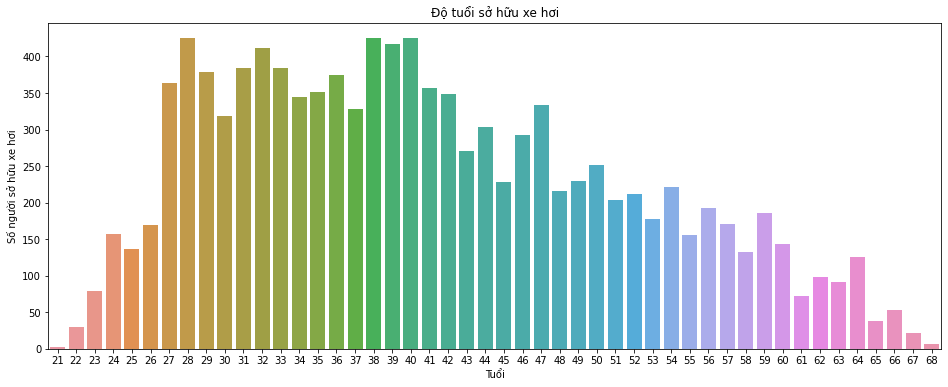

In [87]:
# list_age = [int(age // -365.25) for age in new_data_test.Age]
list_age = (train_df["Age"].to_numpy() // -365.25).tolist()
list_age_unique = np.unique(list_age)
list_age_unique = list(map(int, list_age_unique))
sum = [get_sum_people_by_item(train_df, "Has a car", i) for i in list_age_unique]
print(len(sum))
# plot
plt.figure(figsize=(16,6))
plt.title("Độ tuổi sở hữu xe hơi")
plt.xlabel("Tuổi")
plt.ylabel("Số người sở hữu xe hơi")
g = sns.barplot(x=list_age_unique, y=sum)
# xlabels = [f'{x:f}' for x in g.get_xticks()]
# g.set_xticklabels(xlabels)
plt.show()

Nhận xét: 
- Độ tuổi sở hữu xe hơi phổ biến từ 27 đến 54 tuổi

Tuổi và sở hữu tài sản

48


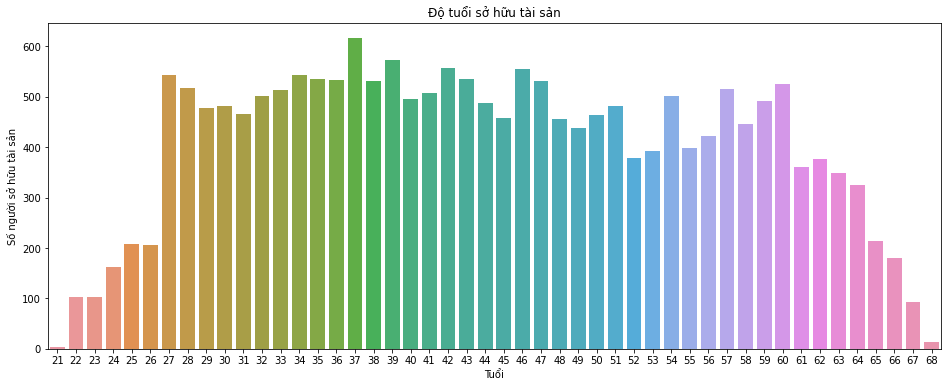

In [90]:
# list_age = (train_df["Age"].to_numpy() // -365.25).tolist()
# list_age_unique = np.unique(list_age)
# list_age_unique = list(map(int, list_age_unique))

sum = [get_sum_people_by_item(train_df, "Has a property", i) for i in list_age_unique]
print(len(sum))

# plot
plt.figure(figsize=(16,6))
plt.title("Độ tuổi sở hữu tài sản")
plt.xlabel("Tuổi")
plt.ylabel("Số người sở hữu tài sản")
sns.barplot(x=list_age_unique, y=sum)
plt.show()

Nhận xét:
- Độ tuổi sở hữu tài sản nhiều nhất là từ 27 đến 60 tuổi

Tuổi và thu nhập

In [92]:
def get_average_income_by_age(df, age):
    sum = 0
    count = 0
    for i in range(len(df)):
        if df["Age"].iloc[i] // -365.25 == age:
            sum += df["Income"].iloc[i]
            # print(df.loc[i, "Income"])
            count += 1
    return sum / count
# get_average_income_by_age(new_data_test, 22)

48


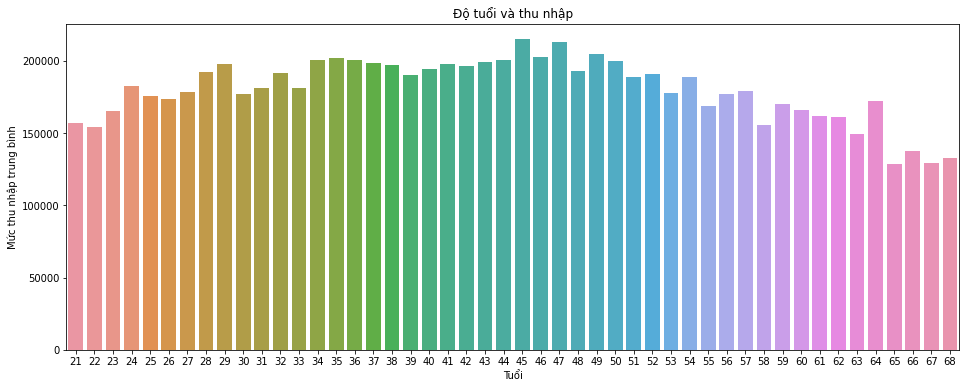

In [93]:

# for i in list_age:
#     sum.append(get_average_income_by_age(new_data_test, i))
sum = [get_average_income_by_age(train_df, i) for i in list_age_unique]
print(len(sum))
# plot
plt.figure(figsize=(16,6))
plt.title("Độ tuổi và thu nhập")
plt.xlabel("Tuổi")
plt.ylabel("Mức thu nhập trung bình")
sns.barplot(x=list_age_unique, y=sum)
plt.show()

Ngành nghề và mức thu nhập

In [102]:
def get_average_income_by_job(df, job):
    sum = 0
    count = 0
    for i in range(len(df)):
        if df["Job title"].iloc[i] == job:
            sum += df["Income"].iloc[i]
            # print(df.loc[i, "Income"])
            count += 1
    # print(sum)
    # # print(count)
    return sum / count


18


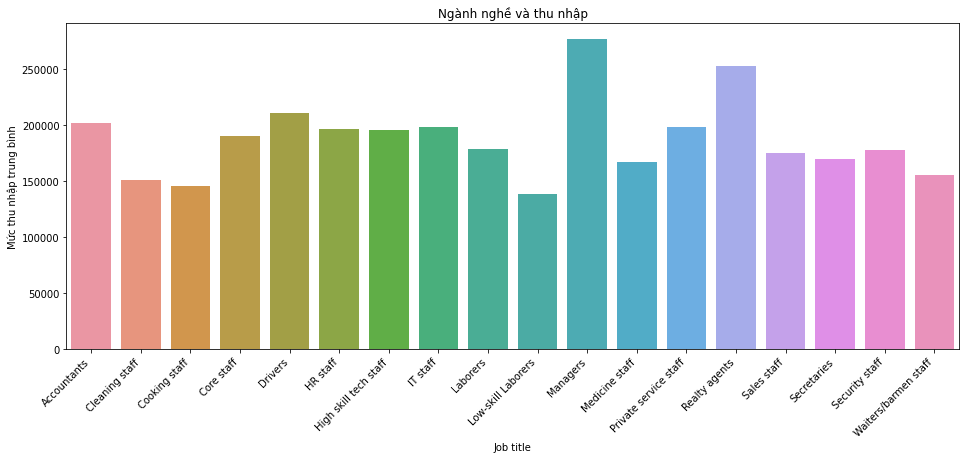

In [103]:
job_title = train_df.groupby(["Job title"])["Job title"].size()

sum = [get_average_income_by_job(train_df, i) for i in job_title.index]
print(len(sum))
# plot
plt.figure(figsize=(16,6))
plt.title("Ngành nghề và thu nhập")
plt.xlabel("Ngành nghề")
plt.ylabel("Mức thu nhập trung bình")
chart = sns.barplot(x=job_title.index, y=sum)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [105]:
print(sum[9])

138391.30434782608


Nhận xét: 
- Ngành nghề có thu nhập cao nhất là: Quản lý (Managers) khoảng : 277376
- Ngành nghề có thu nhập thấp nhất là: công nhân ít kỹ năng (Low-skills labour): 138391

SCATTER PLOT 

Giới tính và thu nhập

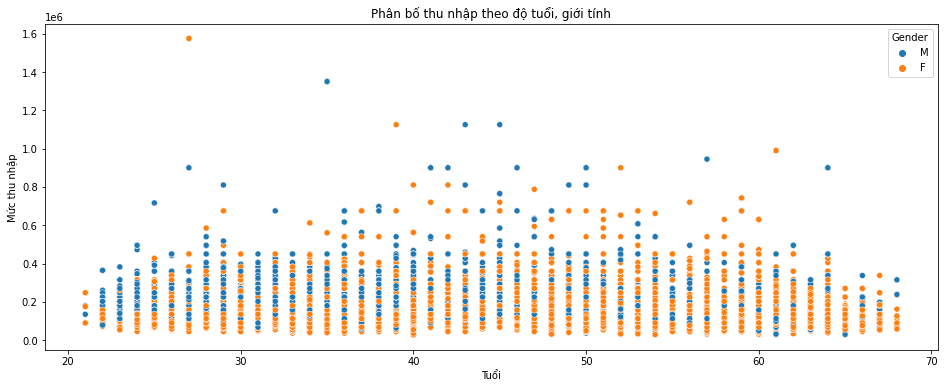

In [108]:
plt.figure(figsize=(16,6))
plt.title("Phân bố thu nhập theo độ tuổi, giới tính")
plt.xlabel("Tuổi")
plt.ylabel("Mức thu nhập")
sns.scatterplot(x=list_age, y=train_df.Income, hue=train_df.Gender)
# sns.regplot(x=list_age, y=new_data_test.Income)
plt.show()

Nhận xét: 
- Phụ nữ ở hầu hết các độ tuổi có thu nhập trung bình thấp hơn nam giới cùng độ tuổi

Độ tuổi và học vấn

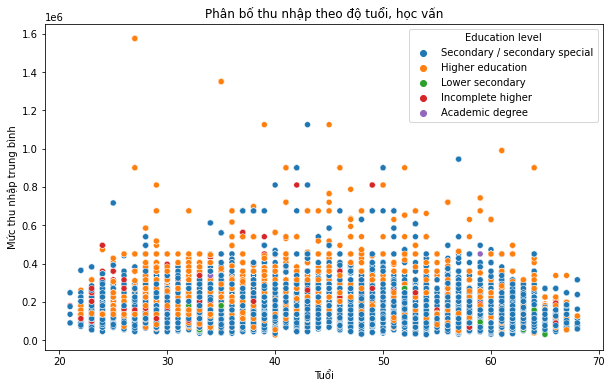

In [109]:
plt.figure(figsize=(10,6))
plt.title("Phân bố thu nhập theo độ tuổi, học vấn")
plt.xlabel("Tuổi")
plt.ylabel("Mức thu nhập trung bình")
sns.scatterplot(x=list_age, y=train_df.Income, hue=train_df["Education level"])
# sns.regplot(x=list_age, y=new_data_test.Income)
plt.show()

Nhận xét: 
- Trình độ học vấn phổ biến: Secondary và Higher Education
- Người có Trình độ học vấn Higher education thường có thu nhập cao hơn người có trình độ học vấn Secondary

Phân bố thu nhập theo độ tuổi, tình trạng hôn nhân

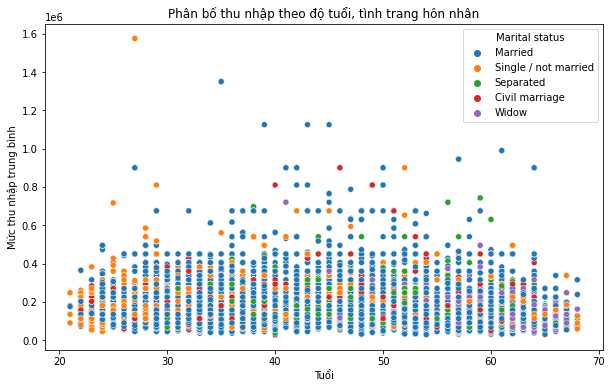

In [110]:
plt.figure(figsize=(10,6))
plt.title("Phân bố thu nhập theo độ tuổi, tình trang hôn nhân")
plt.xlabel("Tuổi")
plt.ylabel("Mức thu nhập trung bình")
sns.scatterplot(x=list_age, y=train_df.Income, hue=train_df["Marital status"])
# sns.regplot(x=list_age, y=new_data_test.Income)
plt.show()

Nhận xét:
- Tình trạng hôn nhân chiếm đa số :Married
- Độ tuổi trước 30 :Tình trạng hôn nhan phổ biến: Single
- Độ tuổi sau 60: Tình trạng hôn nhân phổ biến: Widow

Thu nhập và số năm làm việc

24257


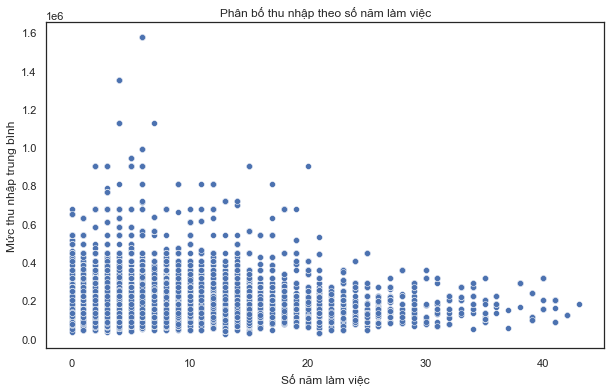

In [121]:
new_data = train_df.copy()
# for i in range(len(new_data)):
#     # print(new_data_test.loc[i, "Employment length"])
#     if new_data["Employment length"].iloc[i] == 365243:
#         new_data.drop([i], inplace=True)
new_data_satisfy = new_data[new_data["Employment length"] != 365243]
# list_employment_length = [int(year // -365.25) for year in new_data["Employment length"]]
list_employment_length= (new_data_satisfy["Employment length"].to_numpy() // -365.25).tolist()

print(len(list_employment_length))
plt.figure(figsize=(10,6))
plt.title("Phân bố thu nhập theo số năm làm việc")
plt.xlabel("Số năm làm việc")
plt.ylabel("Mức thu nhập trung bình")
sns.scatterplot(x=list_employment_length, y=new_data_satisfy.Income)
plt.show()

Tương quan giữa số con và số thành viên gia đình

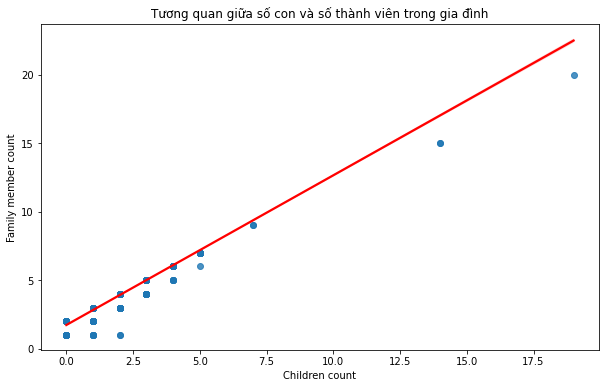

In [111]:
plt.figure(figsize=(10,6))
plt.title("Tương quan giữa số con và số thành viên trong gia đình")
plt.xlabel("Số con")
plt.ylabel("Số thành viên trong gia đình")
sns.regplot(x='Children count',y='Family member count',data=train_df,line_kws={'color': 'red'})
plt.show()

Biểu đồ tương quan giữa các biến

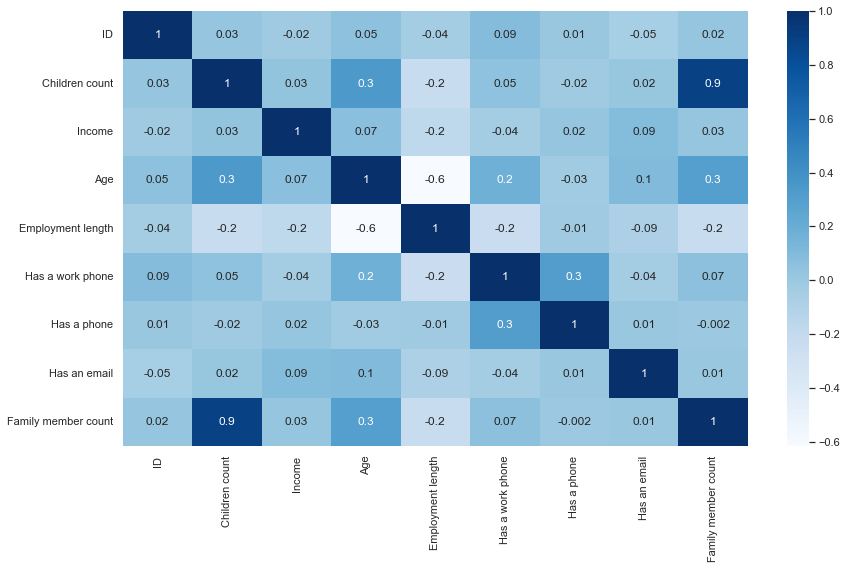

In [114]:
new_data = train_df.copy()
new_data.drop(["Has a mobile phone", "STATUS", "dep_value", "Is high risk"], axis=1, inplace=True)
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = new_data.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [ ]:
new_data_test["Is high risk"]

Data Cleaning
 - Kiểm tra, xử lý những nội dung thiếu dữ liệu (dữ liệu NaN)
 - Đánh giá, xóa bỏ các cột không có ý nghĩa hoặc không liên quan đến kết quả đích

In [21]:
# Kiểm tra xem các ô trong dataframe có chứa giá trị trống NaN hay không
missing_value = train_df.isnull().sum()
missing_value

ID                         0
STATUS                 29165
Gender                     0
Has a car                  0
Has a property             0
Children count             0
Income                     0
Employment status          0
Education level            0
Marital status             0
Dwelling                   0
Age                        0
Employment length          0
Has a mobile phone         0
Has a work phone           0
Has a phone                0
Has an email               0
Job title               9027
Family member count        0
dep_value                  0
Is high risk               0
dtype: int64

In [23]:
# Cách xử lý giá trị NaN: Xóa bỏ các cột hoặc hàng chứa giá trị NaN
train_df_copy = train_df.copy()
train_df_copy.drop(["STATUS", "Job title"], axis=1, inplace=True)
train_df_copy

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,dep_value,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,2.0,0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,2.0,0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,4.0,0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,1.0,0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-23400,365243,1,0,1,1,1.0,0,0
29161,5029193,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15532,-8256,1,0,0,0,3.0,0,0
29162,5047710,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,-17782,-3291,1,1,1,0,2.0,0,0
29163,5009886,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21635,365243,1,0,1,0,2.0,0,0


In [24]:
# Kiểm tra lại 
missing_value = train_df_copy.isnull().sum()
missing_value

ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Family member count    0
dep_value              0
Is high risk           0
dtype: int64

In [34]:
#Kiểm tra số người có điện thoại di động so với số người trong dataset
print(len(train_df_copy))
print(train_df_copy["Has a mobile phone"].count())

29165
29165


Đánh giá các cột không quan trọng để xóa bỏ
- ID: ID là giá trị để định danh khách hàng, không có giá trị khi đánh giá khách hàng có khả năng tín dụng hay không
- Has a mobile phone: Mọi người trong dataset đều có điện thoại di động nên giá trị cột này không còn ý nghĩa đánh giá
- Children count: Giá trị này có tương quan rất mạnh với biến Family member nên có thể bỏ
- Job title: cột này chứa nhiều giá trị NaN

In [ ]:
train_df_copy.drop(["ID", "Has a mobile phone", "Children count"], axis=1, inplace=True)
train_df_copy

Convert time